In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

<h3>Creating dataset</h3>

In [3]:
os.chdir(r"C:\Users\HP\Documents\Hackathon crop ield prediction\_Leaves+dataset+for+tree+species+classification_leafsnap-dataset\leafsnap-dataset")

# Define the full root path of your dataset
root_dir = os.path.join(os.getcwd(), "dataset")  # Full path to the dataset folder
# List of species
species_list = [
    'abies_concolor', 
    'abies_nordmanniana', 
    'acer_campestre', 
    'acer_ginnala', 
    'acer_graseum'
]

# Initialize an empty list to store image metadata
data = []

# Walk through the directory structure
for folder_type in ['images', 'segmented']:
    for environment in ['lab', 'field']:
        folder_path = os.path.join(root_dir, folder_type, environment)
        if os.path.exists(folder_path):  # Ensure the environment path exists
            for species_folder in species_list:
                species_path = os.path.join(folder_path, species_folder)
                if os.path.isdir(species_path):  # Check if species directory exists
                    for img_file in os.listdir(species_path):
                        if img_file.endswith(('.png', '.jpg', '.jpeg')):
                            img_path = os.path.join(species_path, img_file)
                            # Append relevant metadata (folder type, environment, species, image path)
                            data.append([folder_type, environment, species_folder, img_path])

# Create a DataFrame from the collected metadata
df = pd.DataFrame(data, columns=['Folder_Type', 'Environment', 'Species', 'Image_Path'])
print(df.head())

  Folder_Type Environment         Species  \
0      images         lab  abies_concolor   
1      images         lab  abies_concolor   
2      images         lab  abies_concolor   
3      images         lab  abies_concolor   
4      images         lab  abies_concolor   

                                          Image_Path  
0  C:\Users\HP\Documents\Hackathon crop ield pred...  
1  C:\Users\HP\Documents\Hackathon crop ield pred...  
2  C:\Users\HP\Documents\Hackathon crop ield pred...  
3  C:\Users\HP\Documents\Hackathon crop ield pred...  
4  C:\Users\HP\Documents\Hackathon crop ield pred...  


In [4]:
# Check how many unique species are in the dataset
print(df['Species'].value_counts())

# Check how many images per environment (lab vs. field)
print(df['Environment'].value_counts())

# Check how many images per folder type (images vs. segmented)
print(df['Folder_Type'].value_counts())


Species
abies_concolor        502
abies_nordmanniana    318
acer_ginnala          302
acer_campestre        288
Name: count, dtype: int64
Environment
lab      1104
field     306
Name: count, dtype: int64
Folder_Type
images       705
segmented    705
Name: count, dtype: int64


In [5]:
#pip install matplotlib pillow
from PIL import Image

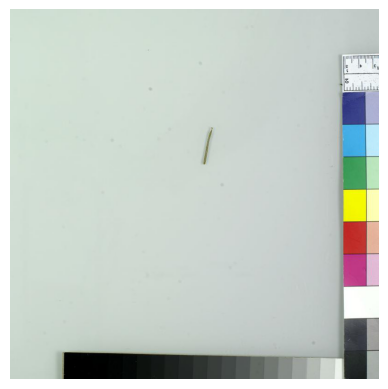

In [6]:
img_path = df['Image_Path'].iloc[0]  # Get the path of the first image
# Load and display the image using PIL and matplotlib
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

Showing first image of the datsaset


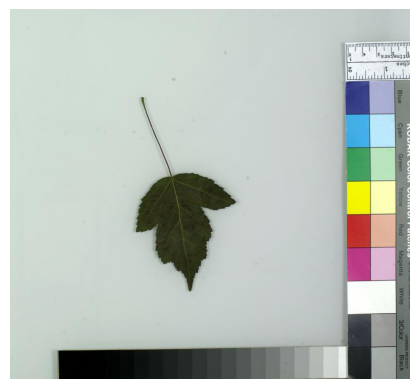

In [8]:
# To display the 5th image in the DataFrame
img_path = df['Image_Path'].iloc[500]  # Adjust index as needed
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
import tensorflow as tf

<h3>Image preprocessing</h3>

In [17]:
#pip install scikit-learn
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['Species'])

# Then, split temp_df into validation (15%) and test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df['Species'])

# Check the sizes of the resulting DataFrames
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 987
Validation set size: 211
Test set size: 212


In [18]:
import shutil

# Define the root output directory where the new dataset structure will be saved
output_dir = r"C:\Users\HP\Documents\Hackathon crop ield prediction\_Leaves+dataset+for+tree+species+classification_leafsnap-dataset\leafsnap-dataset"

# Function to move images into the correct directories and convert them to RGB
def move_images(df, split_type):
    for index, row in df.iterrows():
        species = row['Species']
        img_path = row['Image_Path']
        
        # Define the target directory (train/validation/test based on split_type)
        target_dir = os.path.join(output_dir, split_type, species)
        
        # Create the target directory if it doesn't exist
        os.makedirs(target_dir, exist_ok=True)
        
        # Open the image and convert it to RGB
        try:
            img = Image.open(img_path).convert('RGB')
            # Define the new image path in the target directory
            target_img_path = os.path.join(target_dir, os.path.basename(img_path))
            # Save the image in the target directory
            img.save(target_img_path)
        except Exception as e:
            print(f"Error converting image {img_path}: {e}")

# Assuming 'df' is your original DataFrame containing the image paths and labels
# First, split data into training (70%) and temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['Species'])

# Then, split temp_df into validation (15%) and test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df['Species'])

# Move images for each split and convert them to RGB
move_images(train_df, 'train')
move_images(val_df, 'validation')
move_images(test_df, 'test')

print("Images have been successfully moved and converted to RGB for train, validation, and test sets.")

Images have been successfully moved and converted to RGB for train, validation, and test sets.


### Data Preprocessing

### Train Image Preprocessing

In [21]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 987 files belonging to 4 classes.


### Validation Image Preprocessing

In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 211 files belonging to 4 classes.


In [24]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [25]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [26]:
 for x,y in training_set:
     print(x,x.shape)
     print(y,y.shape)
     break

tf.Tensor(
[[[[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [177.875    188.875    194.875   ]
   [176.       187.       193.      ]
   [173.7539   184.7539   190.7539  ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [177.78125  188.78125  194.78125 ]
   [178.03125  189.03125  195.03125 ]
   [176.       187.       193.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [180.125    191.125    197.125   ]
   [180.       191.       197.      ]
   [178.       189.       195.      ]]

  ...

  [[247.       253.       251.      ]
   [248.       254.       252.      ]
   [248.125    253.875    252.      ]
   ...
   [ 19.        20.75      19.875   ]
   [ 21.        23.        22.      ]
   [ 22.        24.        23.      ]]

  [[245.       254.       251.    

### Building Model

In [28]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [29]:
model=Sequential()

In [30]:
#adding layers to CNN
model.add(Conv2D(filters=32 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#adding layers to CNN
model.add(Conv2D(filters=64 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#adding layers to CNN
model.add(Conv2D(filters=128 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
#adding layers to CNN
model.add(Conv2D(filters=256 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256 ,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(units=256,activation='relu'))

In [38]:
#output layer
model.add(Dense(units=4,activation='softmax'))     

### compiling model

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,367,844 (20.48 MB)

 Trainable params: 5,367,844 (20.48 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [326]:
training_accuracy=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
20/31 ━━━━━━━━━━━━━━━━━━━━ 1:29 8s/step - accuracy: 0.3311 - loss: 12.8722


KeyboardInterrupt



### Model Evaluation

In [ ]:
train_loss,train_acc=model.evaluate(training_set)

In [ ]:
print(train_loss,train_acc)

### Model on Validation Set

In [ ]:
val_loss,val_acc=model.evaluate(validation_set)

In [ ]:
print(val_loss,val_acc)

### Saving Model

In [ ]:
model.save("trained_crop_model.keras")

In [ ]:
training_accuracy.history

In [ ]:
#Recording history of the model 
import json
with open("training_hist.json","w") as f:
    json.dump(training_accuracy.history,f)

### Accuracy Visualization

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_accuracy.history['accuracy'],color='red',label="Training Accuracy")
plt.plot(epochs,training_accuracy.history['val_accuracy'],color='blue',label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization Of Accuracy Result")
plt.legend()
plt.show()

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_accuracy.history['loss'],color='red',label="Training Loss")
plt.plot(epochs,training_accuracy.history['val_loss'],color='blue',label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Result")
plt.title("Visualization Of Loss Result")
plt.legend()
plt.show()

### Other Evaluation Metrics

In [ ]:
class_name=validation_set.class_names
class_name 

In [ ]:
#With Shuffle
test_set = tf.keras.utils.image_dataset_from_directory(
    "validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

In [ ]:
y_pred=model.predict(test_set) 
y_pred,y_pred.shape

In [ ]:
#without shuffle
test_set_shuffle = tf.keras.utils.image_dataset_from_directory(
    "validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

In [ ]:
y_pred2=model.predict(test_set_shuffle) 
y_pred2,y_pred2.shape

In [ ]:
predicted_cat=tf.argmax(y_pred,axis=1)

In [ ]:
predicted_cat

In [ ]:
predicted_cat_shuffle=tf.argmax(y_pred2,axis=1)

In [ ]:
true_cat=tf.concat([y for x,y in test_set],axis=0)
true_cat

In [ ]:
y_true=tf.argmax(true_cat,axis=1)
y_true

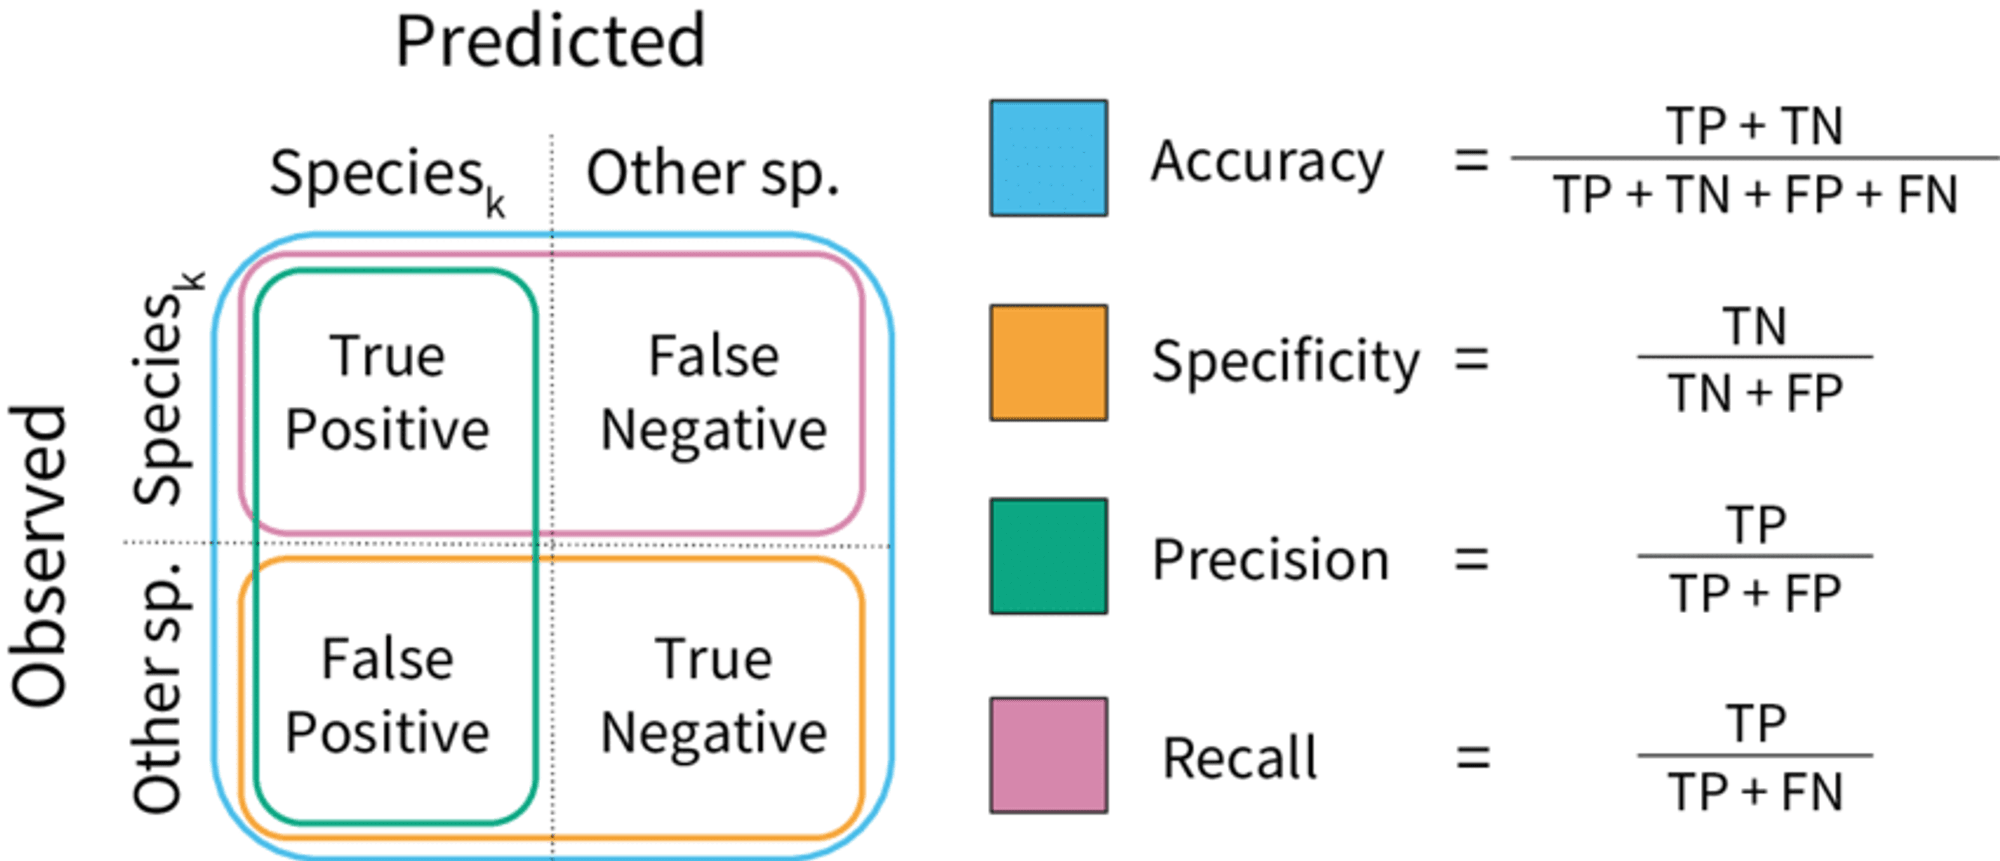![image.png]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_true,predicted_cat,target_names=class_name))

In [ ]:
cm=confusion_matrix(y_true,predicted_cat)
print(cm,cm.shape)

### Confusion Matrix Visulaization

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Plant Species Classification Confusiuon Matrix")
plt.show()